# **Tiles Challenge**

**The Problem**

---
*Summary*

Find a suitable arrangement of different sized tiles in a given area

*Conditions*

1.   Area = 25m^2 (assume 5m x 5m)
2.   Tile sizes:

  *   A: 900mm x 600mm
  *   B: 600mm x 600mm
  *   C: 300mm x 296mm
  *   D: 296mm x 296mm
3. Tiles must have a 4mm gap between
4. We want a random pattern of tiles (for now assume no 2 tiles of the same type may share an edge)





# First Iteration
---
**For my first iteration I want to write a function that will fill an area with multiple coloured tiles of the same size. I should be able to pass in a dataframe of any number of tile types and get a pattern of tiles that do not have 2 of the same type of tile sharing an edge.**

Upon a quick Google search I found this: https://stackoverflow.com/questions/58770614/writing-an-algorithm-for-tiling-a-floor-using-python

Whilst this problem isn't exactly the same as the one I'm trying to solve I think it's a good starting point.

In [0]:
def place_tiles(room_length, room_width , tile_dim):
    placement = []

    num_of_tiles_per_row = int(room_length / tile_dim)
    num_of_tiles_per_col = int(room_width / tile_dim)
    prev_tile = None

    for c in range(num_of_tiles_per_col):
        cur_row_tiles = []


        for r in range(num_of_tiles_per_row):
            if prev_tile and prev_tile == "w":
                cur_row_tiles.append("b")
                prev_tile = "b"

            else:
                cur_row_tiles.append("w")
                prev_tile = "w"
        placement.append(cur_row_tiles)
        prev_tile = cur_row_tiles[0]
    return placement

place_tiles(10,10,1)

[['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w']]

Refactor the above function to table the tile length and width as separate arguements

In [0]:
def place_tiles(room_length, room_width , tile_length, tile_width):
    placement = []

    num_of_tiles_per_row = int(room_length / tile_length)
    num_of_tiles_per_col = int(room_width / tile_width)
    prev_tile = None

    for c in range(num_of_tiles_per_col):
        cur_row_tiles = []


        for r in range(num_of_tiles_per_row):
            if prev_tile and prev_tile == "w":
                cur_row_tiles.append("b")
                prev_tile = "b"

            else:
                cur_row_tiles.append("w")
                prev_tile = "w"
        placement.append(cur_row_tiles)
        prev_tile = cur_row_tiles[0]
    return placement

place_tiles(10,10,1,2)

[['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b']]

This is pretty good but need to refactor so that it can take various tile types as an arguement.

First step is to rewrite this code to take white and black tiles of the same size as an argument and produce the same output as above.

Create a dataframe of different tiles

In [0]:
#import pandas
import pandas as pd 
import random as rnd

data = {'Tile_Label':  ['B','W'],
        'Tile_Length': [1,1],
        'Tile_Width': [2,2]}

df = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width'])

In [0]:
#Check data looks as expected
df.head()

,Tile_Label,Tile_Length,Tile_Width
0,B,1,2
1,W,1,2


In [0]:
def place_tiles(room_length, room_width , tiles):
    placement = []
    
    num_of_tiles_per_row = int(room_width / tiles["Tile_Width"].mean())
    num_of_tiles_per_col = int(room_length / tiles["Tile_Length"].mean())
    prev_tile = None

    for c in range(num_of_tiles_per_col):
        cur_row_tiles = []

        for r in range(num_of_tiles_per_row):
          if c == 0 and r == 0:
            rand = rnd.randint(0,len(tiles.index) - 1)
            cur_row_tiles.append(tiles["Tile_Label"][rand])
            prev_tile = tiles["Tile_Label"][rand]

          else:
            next_tile_index = (tiles.index[tiles["Tile_Label"] == prev_tile][0] + 1) % len(tiles.index)
            next_tile = tiles["Tile_Label"][next_tile_index]
            cur_row_tiles.append(next_tile)
            prev_tile = next_tile

        placement.append(cur_row_tiles)
        prev_tile = cur_row_tiles[0]
    return placement

In [0]:
place_tiles(10,10,df)

[['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W']]

Looks like this works! 

Lets test it with multiple tiles!

In [0]:
data = {'Tile_Label':  ['B','W','G','R'],
        'Tile_Length': [1,1,1,1],
        'Tile_Width': [2,2,2,2]}

df2 = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width'])

In [0]:
df2.head()

,Tile_Label,Tile_Length,Tile_Width
0,B,1,2
1,W,1,2
2,G,1,2
3,R,1,2


In [0]:
place_tiles(10,10,df2)

[['W', 'G', 'R', 'B', 'W'],
 ['G', 'R', 'B', 'W', 'G'],
 ['R', 'B', 'W', 'G', 'R'],
 ['B', 'W', 'G', 'R', 'B'],
 ['W', 'G', 'R', 'B', 'W'],
 ['G', 'R', 'B', 'W', 'G'],
 ['R', 'B', 'W', 'G', 'R'],
 ['B', 'W', 'G', 'R', 'B'],
 ['W', 'G', 'R', 'B', 'W'],
 ['G', 'R', 'B', 'W', 'G']]

**Happy days!!**

# Turning an array of tiles into an image
---
**It would be cool to be able to visualise the tile arrangement with colours.**

I Like an array of tile configuration as an output but it'd be cool to show this visually!

I found this on stack overflow and reckon it will do the job. https://stackoverflow.com/questions/43971138/python-plotting-colored-grid-based-on-values

The goal is to build an function for which I can pass in an array of tiles and get a visual representation of the arrangement.

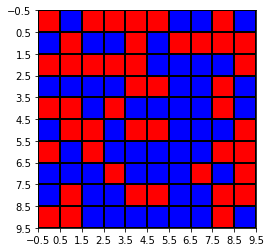

In [0]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));

plt.show()

I quite like this but need to make a few changes. It needs to take a tile arrangement as an arguement and create a custom colour map, it would also be good to get rid of the axis labels.

First lets add another column to our tiles dataframe so specify the colour that tile should be. I can use this as a lookup for the plotting function.

In [0]:
data = {'Tile_Label':  ['B','W','R'],
        'Tile_Length': [1,1,1],
        'Tile_Width': [1,1,1],
        'Tile_Colour':['black','white','red']}

df3 = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width','Tile_Colour'])

In [0]:
def colour_tiles(arrangement, tiles):
  #Create discrete colormap
  cmap = colors.ListedColormap(tiles["Tile_Colour"])
  bounds = tiles.index.to_list()
  bounds.append(len(tiles.index))
  norm = colors.BoundaryNorm(bounds, cmap.N)

  #Create a lookup dictionary to replace tile labels with numeric values
  lookup = dict(zip(tiles["Tile_Label"], tiles.index.to_list()))

  #Replace the tile labels with numbers
  data = []

  for line in arrangement:
    n_line = (pd.Series(line)).map(lookup)
    data.append(list(n_line))

  #Create the plot
  fig, ax = plt.subplots()
  ax.imshow(data, cmap=cmap, norm=norm)

  #Draw gridlines
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)

  #Will need this to read in length of data to set ticks
  ax.set_xticks(np.arange(-0.5, 10, 1));
  ax.set_yticks(np.arange(-0.5, 10, 1));

  #Hide Tick Labels
  ax.set_xticklabels([]);
  ax.set_yticklabels([]);

  #Show plot
  plt.show()

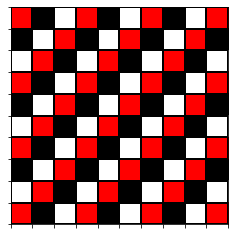

In [0]:
colour_tiles(place_tiles(10,10,df3),df3)

This works for a 10 x 10 grid of 1x1 tiles, need to add in functionality to create custom size grids and plot different sizes tiles. Good start!